In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD

In [ ]:
pd.set_option('display.max_rows', None)
np.set_printoptions(suppress=True)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df_cat=df.select_dtypes(object)  
df_num=df.select_dtypes(['int64','float64']) 

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  10000 non-null  object
 1   Gender     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df_num['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [ ]:
df_num['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
df_num['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
df_num['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [ ]:
df_num['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [ ]:
df_num['HasCrCard'].unique()

array([1, 0])

In [ ]:
df_num['IsActiveMember'].unique()

array([1, 0])

In [ ]:
df_num['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
df_num['Exited'].unique()

array([1, 0])

In [ ]:
df_cat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df_cat['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
print(df_cat.head())

   Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [ ]:
new_df=pd.concat([df_cat,df_num],axis=1)
new_df.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,2,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,2,0,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=new_df.drop('Exited',axis=1)
y=new_df['Exited']

In [ ]:
x.shape

(10000, 10)

In [ ]:
x.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,42,2,0.00,1,1,1,101348.88
1,2,0,608,41,1,83807.86,1,0,1,112542.58
2,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,699,39,1,0.00,2,0,0,93826.63
4,2,0,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.shape

(10000,)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
ss=StandardScaler()

In [ ]:
X_train_ss = ss.fit_transform(X_train)

In [ ]:
X_train_ss

array([[-0.90542304, -1.08628092, -0.06042858, ...,  0.64198477,
        -1.01903834, -1.37686713],
       [-0.90542304, -1.08628092, -1.74363086, ...,  0.64198477,
         0.98131735, -1.31233857],
       [-0.90542304, -1.08628092,  0.31132161, ...,  0.64198477,
        -1.01903834, -0.31884349],
       ...,
       [-0.90542304, -1.08628092,  0.22871046, ...,  0.64198477,
         0.98131735, -0.14048457],
       [-0.90542304, -1.08628092,  0.13577291, ...,  0.64198477,
         0.98131735,  0.01856724],
       [ 0.30503557,  0.92057219,  1.16841234, ...,  0.64198477,
        -1.01903834, -1.15947765]])

In [ ]:
X_test_ss= ss.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [ ]:
trained_model = model.fit(X_train_ss,y_train,epochs=300)

Epoch 1/300
219/219 [==============================] - 1s 1ms/step - loss: 0.6395
Epoch 2/300
219/219 [==============================] - 0s 1ms/step - loss: 0.5037
Epoch 3/300
219/219 [==============================] - 0s 1ms/step - loss: 0.5035
Epoch 4/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4841
Epoch 5/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4736
Epoch 6/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4739
Epoch 7/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4527
Epoch 8/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4521
Epoch 9/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4458
Epoch 10/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4231
Epoch 11/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4319
Epoch 12/300
219/219 [==============================] - 0s 1ms/step - loss: 0.4298
Epoch 13/300


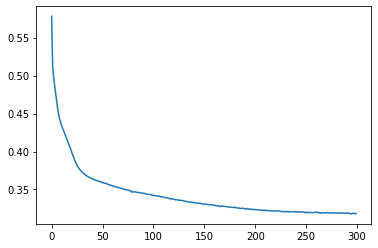

In [ ]:
plt.plot(trained_model.history['loss'])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [ ]:
tbl=pd.DataFrame(list(zip(y_test,y_pred)),columns=['y_observed','y_predicted'])
print(tbl)

      y_observed y_predicted
0              0         [0]
1              0         [1]
2              0         [0]
3              0         [1]
4              0         [1]
5              0         [1]
6              0         [1]
7              0         [1]
8              0         [1]
9              0         [1]
10             0         [1]
11             1         [0]
12             0         [0]
13             0         [1]
14             0         [0]
15             0         [1]
16             0         [0]
17             0         [1]
18             0         [0]
19             0         [1]
20             0         [1]
21             0         [1]
22             0         [0]
23             0         [1]
24             0         [1]
25             0         [0]
26             1         [1]
27             1         [1]
28             0         [0]
29             0         [0]
30             0         [1]
31             0         [1]
32             0         [1]
33            

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.39      0.53      2373
           1       0.24      0.74      0.36       627

    accuracy                           0.46      3000
   macro avg       0.55      0.56      0.45      3000
weighted avg       0.72      0.46      0.50      3000

